<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/HW_Machine_Learning_Models_with_Python_(Supervised)_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENCE<BR>
MACHINE LEARNING MODELS WITH PYTHON

## Indikator penilaian
## Wajib di google colab, jika tidak di google colab ada pengurangan nilai -5
## Pengerjaan harus sesuai template yang disediakan, jika tidak ada pengurangan nilai -5 (untuk memudahkan membaca code)
## share to arifromadhan19@gmail.com

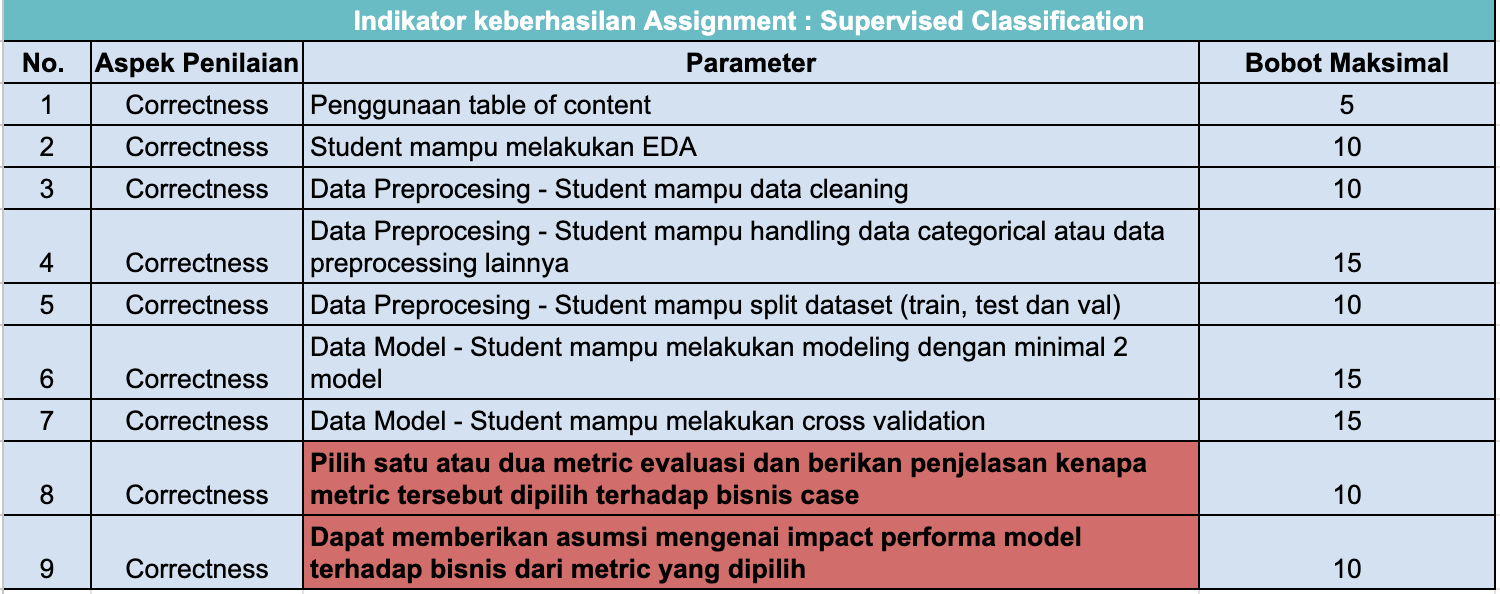

In [ ]:
# Import Library
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## `DATA UNDERSTANDING`

Mengeksplorasi data untuk mendapatkan wawasan awal serta memastikan kualitas data.

Memprediksi apakah pelanggan akan berhenti berlangganan (`Churn`) berdasarkan berbagai variabel yang mempengaruhi keputusan pelanggan dalam menggunakan layanan.

### **Deskripsi Variabel**  
Dataset memiliki **7.043** entri dan **21** kolom, termasuk:  

| Nama Kolom          | Deskripsi |
|---------------------|-----------|
| **customerID**     | ID unik pelanggan |
| **gender**         | Jenis kelamin pelanggan (Male/Female) |
| **SeniorCitizen**  | Apakah pelanggan adalah warga senior (1 = Ya, 0 = Tidak) |
| **Partner**        | Apakah pelanggan memiliki pasangan (Yes/No) |
| **Dependents**     | Apakah pelanggan memiliki tanggungan (Yes/No) |
| **tenure**         | Lama berlangganan dalam bulan |
| **PhoneService**   | Apakah pelanggan memiliki layanan telepon (Yes/No) |
| **MultipleLines**  | Apakah pelanggan memiliki lebih dari satu saluran telepon (No, Yes, No phone service) |
| **InternetService** | Jenis layanan internet yang digunakan (DSL, Fiber optic, No) |
| **OnlineSecurity** | Apakah pelanggan memiliki layanan keamanan online (Yes, No, No internet service) |
| **OnlineBackup**   | Apakah pelanggan memiliki layanan pencadangan online (Yes, No, No internet service) |
| **DeviceProtection** | Apakah pelanggan memiliki perlindungan perangkat (Yes, No, No internet service) |
| **TechSupport**    | Apakah pelanggan memiliki dukungan teknis (Yes, No, No internet service) |
| **StreamingTV**    | Apakah pelanggan memiliki layanan streaming TV (Yes, No, No internet service) |
| **StreamingMovies** | Apakah pelanggan memiliki layanan streaming film (Yes, No, No internet service) |
| **Contract**       | Jenis kontrak pelanggan (Month-to-month, One year, Two year) |
| **PaperlessBilling** | Apakah pelanggan menggunakan tagihan tanpa kertas (Yes/No) |
| **PaymentMethod**  | Metode pembayaran yang digunakan (Electronic check, Mailed check, Bank transfer, Credit card) |
| **MonthlyCharges** | Jumlah tagihan bulanan pelanggan |
| **TotalCharges**   | Total tagihan pelanggan selama berlangganan |
| **Churn**          | Apakah pelanggan berhenti berlangganan (Yes/No) (`variabel target`)|

Variabel **Churn** merupakan target yang akan diprediksi.


### Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/'

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_columns', None)
file_name = data_path + 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv(file_name)
df_churn = df.copy()
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`TotalCharges` saat ini bertipe object, padahal seharusnya float atau numeric karena berisi total biaya yang dibayarkan pelanggan.

In [ ]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors="coerce")
# Opsi errors="coerce" digunakan untuk mengubah nilai yang tidak bisa dikonversi menjadi NaN

Memastikan bahwa semua kolom memiliki tipe data yang optimal, menggunakan metode `convert_dtypes()` untuk mengonversi kolom-kolom ke tipe data yang paling sesuai.

In [ ]:
# konversi tipe data
df_churn = df_churn.convert_dtypes()
df_churn.dtypes

,0
customerID,string[python]
gender,string[python]
SeniorCitizen,Int64
Partner,string[python]
Dependents,string[python]
tenure,Int64
PhoneService,string[python]
MultipleLines,string[python]
InternetService,string[python]
OnlineSecurity,string[python]


Mengelompokkan kolom-kolom dalam DataFrame berdasarkan tipe datanya

In [ ]:
kategorik = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerik = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

### Duplicate Handling

In [ ]:
len(df_churn.drop_duplicates()) / len(df_churn)

1.0

`1.0` menunjukkan bahwa tidak terdapat duplikat

In [ ]:
# Cek kembali apakah benar tidak ada duplikat
duplicates = df_churn[df_churn.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Nilai pada tabel `kosong` menandakan tidak ada baris yang duplikat

### Missing Value Handling

In [ ]:
df_churn[df_churn.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,<NA>,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,<NA>,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,<NA>,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,<NA>,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,<NA>,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,<NA>,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,<NA>,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,<NA>,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7,<NA>,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,<NA>,No


Pada kolom `TotalCharges` terdapat `missing value` nilai yang teridentifikasi adalah `<NA>`

In [ ]:
# percentage version
total_rows = len(df_churn)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df_churn.columns:
    missing_count = df_churn[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'customerID' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'SeniorCitizen' Has 0 missing values (0.00%)
Column 'Partner' Has 0 missing values (0.00%)
Column 'Dependents' Has 0 missing values (0.00%)
Column 'tenure' Has 0 missing values (0.00%)
Column 'PhoneService' Has 0 missing values (0.00%)
Column 'MultipleLines' Has 0 missing values (0.00%)
Column 'InternetService' Has 0 missing values (0.00%)
Column 'OnlineSecurity' Has 0 missing values (0.00%)
Column 'OnlineBackup' Has 0 missing values (0.00%)
Column 'DeviceProtection' Has 0 missing values (0.00%)
Column 'TechSupport' Has 0 missing values (0.00%)
Column 'StreamingTV' Has 0 missing values (0.00%)
Column 'StreamingMovies' Has 0 missing values (0.00%)
Column 'Contract' Has 0 missing values (0.00%)
Column 'PaperlessBilling' Has 0 missing values (0.00%)
Column 'PaymentMethod' Has 0 missing values (0.00%)
Column 'MonthlyCharges' Has 0 missing values (0.00%)
Column 'TotalCharges' Has 11 missing 

Terdapat 11 missing values atau sekitar `0.16%` pada kolom `TotalCharges`.

Mengecek berapa persentase `missing value` pada kolom `TotalCharges`, dalam statistik ketentuannya ialah `jika > 20%` maka di drop kolomnya, `jika <= 20%` maka akan di `handling` karena alasan distribusi data.

Aturan missing value handling :
1. jika tipe datanya itu `numerik` -> handling menggunakan `median` (robust / tahan terhadap outlier)
2. jika tipe datanya itu `kategorik / object / string` -> handling menggunakan `mode / modus`

In [ ]:
#100 * len(df_churn[df_churn['TotalCharges'].isin([pd.NA])]) / len(df_churn)
100 * df_churn['TotalCharges'].isna().sum() / len(df_churn)

0.15618344455487718

In [ ]:
# Menghitung median dari TotalCharges yang tidak missing
median_df = df_churn['TotalCharges'].median()
median_df

1397.475

In [ ]:
# Mengganti nilai yang hilang dengan median
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(median_df)

In [ ]:
df_churn.isna().sum()
#df_churn.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#cek kembali apakah masih ada missing value
total_rows = len(df_churn)
for column in df_churn.columns:
    missing_count = df_churn[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)")

Column 'customerID' Has 0 missing values (0.00%)
Column 'gender' Has 0 missing values (0.00%)
Column 'SeniorCitizen' Has 0 missing values (0.00%)
Column 'Partner' Has 0 missing values (0.00%)
Column 'Dependents' Has 0 missing values (0.00%)
Column 'tenure' Has 0 missing values (0.00%)
Column 'PhoneService' Has 0 missing values (0.00%)
Column 'MultipleLines' Has 0 missing values (0.00%)
Column 'InternetService' Has 0 missing values (0.00%)
Column 'OnlineSecurity' Has 0 missing values (0.00%)
Column 'OnlineBackup' Has 0 missing values (0.00%)
Column 'DeviceProtection' Has 0 missing values (0.00%)
Column 'TechSupport' Has 0 missing values (0.00%)
Column 'StreamingTV' Has 0 missing values (0.00%)
Column 'StreamingMovies' Has 0 missing values (0.00%)
Column 'Contract' Has 0 missing values (0.00%)
Column 'PaperlessBilling' Has 0 missing values (0.00%)
Column 'PaymentMethod' Has 0 missing values (0.00%)
Column 'MonthlyCharges' Has 0 missing values (0.00%)
Column 'TotalCharges' Has 0 missing v

Setelah melakukan missing value handling, kolom-kolom sekarang memiliki 0 missing values `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

### Outlier Handling


In [ ]:
from scipy import stats
def check_plot(df_churn, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_churn[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_churn[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_churn[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
df_churn[numerik].columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

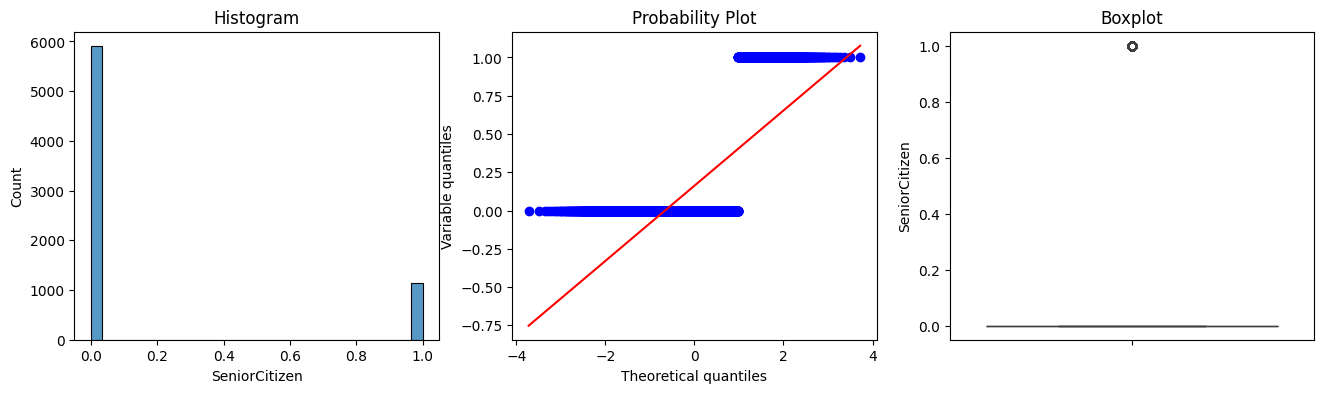

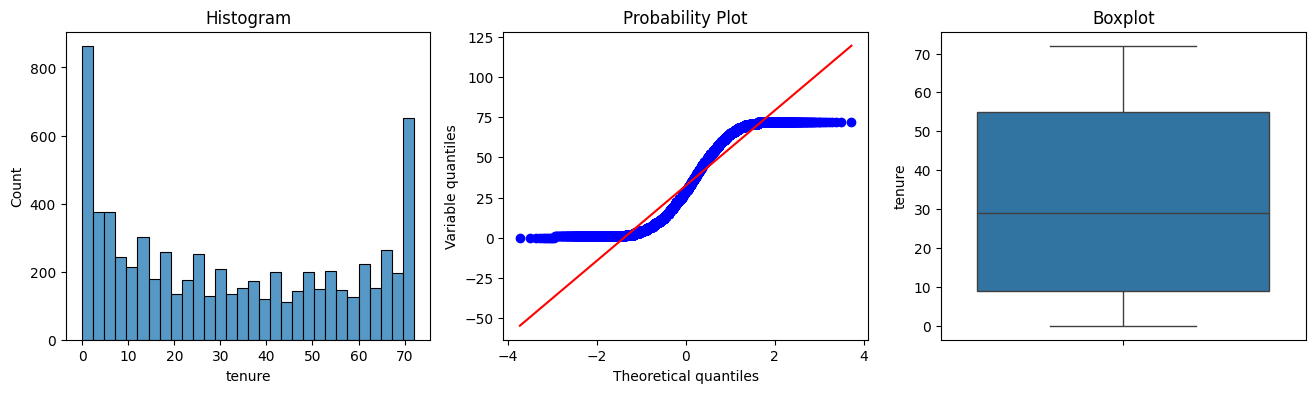

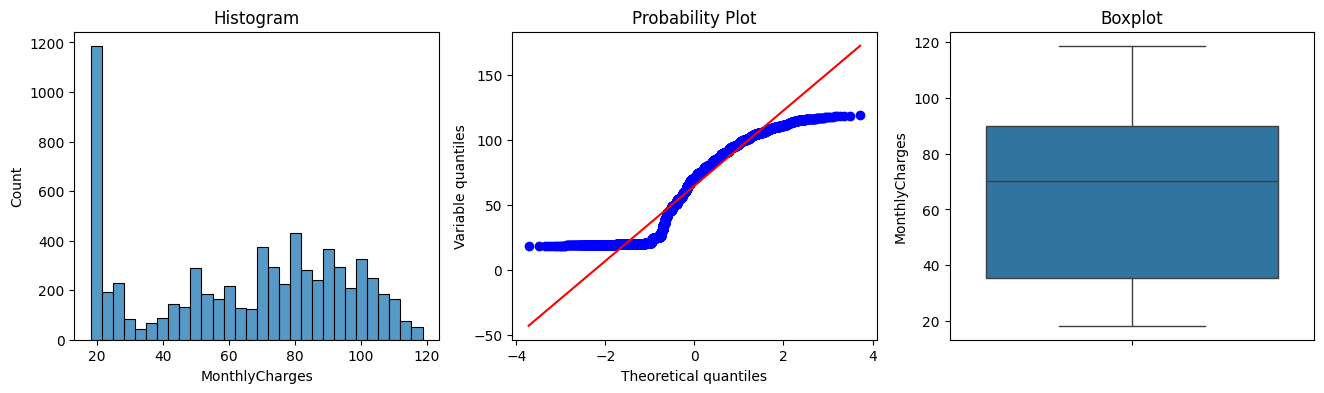

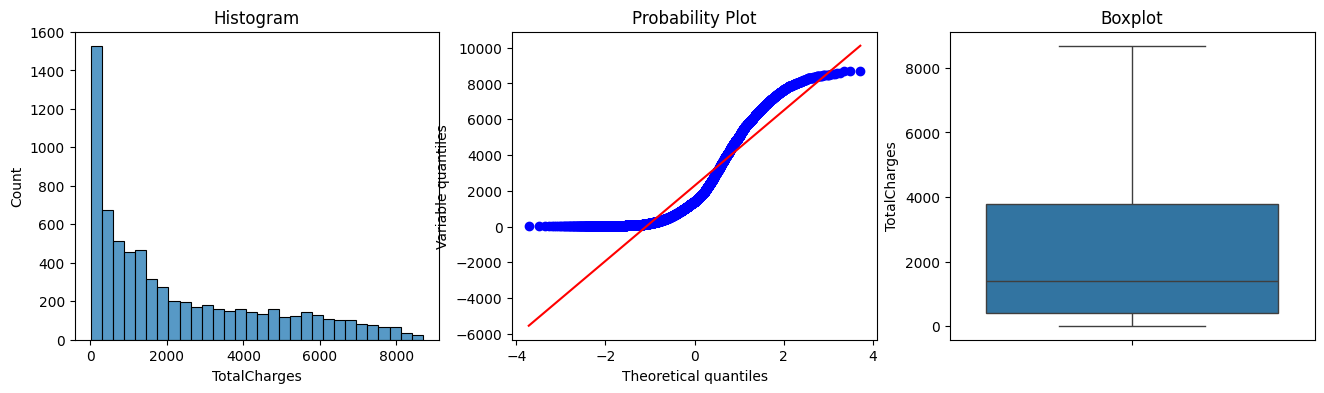

In [ ]:
# Memvisualisasikan outlier
for kolom in ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']:
    df_churn = df_churn.copy()
    check_plot(df_churn, kolom)

Tidak ditemukan outlier pada variabel numerik. Kolom `SeniorCitizen` berisi nilai biner (0 dan 1) dan tidak memiliki outlier. Data telah siap untuk analisis lanjutan.

### Feature Engineering

Dalam dataset ini, nilai "Yes", "No", dan "No internet service/No phone service" sering muncul pada beberapa fitur layanan seperti:
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- MultipleLines

"Yes" → Pelanggan menggunakan layanan tersebut.
"No" → Pelanggan memiliki internet, tetapi tidak menggunakan layanan tersebut.
"No internet service" → Pelanggan tidak memiliki layanan internet, sehingga otomatis tidak bisa menggunakan layanan-layanan tambahan seperti Online Security, Backup, dll.

Menghapus fitur "`No internet service/No phone service`" mengubah menjadi "`No`" untuk menyederhanakan analisis.

In [ ]:
# No internet service
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
# No phone service
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

Tenure_Group: Mengelompokkan pelanggan berdasarkan lama berlangganan (tenure)

In [ ]:
df_churn['Tenure_Group'] = pd.cut( df_churn['tenure'],
    bins=[-1, 0, 12, 24, 48, 60, 72],  # -1 sebagai batas bawah untuk menangkap tenure=0
    labels=['<1 Bulan', '0-1 Tahun', '1-2 Tahun', '2-4 Tahun', '4-5 Tahun', '5-6 Tahun']
)

MonthlyCostPerTenure: Mengetahui rata-rata biaya bulanan pelanggan berdasarkan tenure.

In [ ]:
df_churn['MonthlyCostPerTenure'] = df_churn['TotalCharges'] / (df_churn['tenure'] + 1)
# (+1 untuk menghindari pembagian dengan nol)

In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,MonthlyCostPerTenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 Tahun,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2-4 Tahun,53.985714
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 Tahun,36.05
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No,2-4 Tahun,40.016304
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes,0-1 Tahun,50.55


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customerID            7043 non-null   string  
 1   gender                7043 non-null   string  
 2   SeniorCitizen         7043 non-null   Int64   
 3   Partner               7043 non-null   string  
 4   Dependents            7043 non-null   string  
 5   tenure                7043 non-null   Int64   
 6   PhoneService          7043 non-null   string  
 7   MultipleLines         7043 non-null   string  
 8   InternetService       7043 non-null   string  
 9   OnlineSecurity        7043 non-null   string  
 10  OnlineBackup          7043 non-null   string  
 11  DeviceProtection      7043 non-null   string  
 12  TechSupport           7043 non-null   string  
 13  StreamingTV           7043 non-null   string  
 14  StreamingMovies       7043 non-null   string  
 15  Cont

## `EXPLORATORY DATA ANALYSIS (EDA)`

Tahap ini bertujuan untuk mengidentifikasi pola, ketidak wajaran atau data yang menyimpang, dan hubungan antar variabel, sekaligus memberikan gambaran umum tentang data. EDA memandu proses analisis lebih lanjut dan membantu menentukan pendekatan yang paling sesuai untuk masalah yang sedang dipecahkan.

Karena **Churn** adalah target utama, perlu melihat apa saja faktor yang berpengaruh terhadap Churn.

### Perbandingan Antara Pelanggan yang Churn dan Tidak Churn

In [ ]:
df_churn['Churn'].replace({'No': 'Tidak Churn', 'Yes': 'Churn'}).value_counts()

,count
Churn,
Tidak Churn,5174
Churn,1869


In [ ]:
labels = df_churn['Churn'].replace({'No':'Tidak Churn', 'Yes':'Churn'}).value_counts(sort=True).index
size = df_churn['Churn'].value_counts(sort=True)

In [ ]:
fig = px.pie(
    names=labels,
    values=size,
    hole=0.3,
    labels={'name': 'Status Churn'},
    title='Perbandingan Status Churn',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=24, family='Arial', color='white'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    height=600,
    width=1090
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label+value',
    textfont=dict(size=14, color='black')
)
fig.show()

### Hubungan Churn dengan Karakteristik Pelanggan

a. Gender

In [ ]:
data_gender = df_churn.groupby(['gender', 'Churn']).size().reset_index(name='count')
data_gender

,gender,Churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


b. Senior Citizen, Partner, dan Dependents

In [ ]:
data_customer_status = pd.crosstab([df_churn['SeniorCitizen'], df_churn['Partner'], df_churn['Dependents']], df_churn['Churn'])
data_customer_status

Churn                               No  Yes
SeniorCitizen Partner Dependents           
0             No      No          1872  847
                      Yes          278   75
              Yes     No           921  242
                      Yes         1437  229
1             No      No           285  276
                      Yes            6    2
              Yes     No           312  178
                      Yes           63   20

 ### Hubungan Churn dengan Lama Berlangganan (Tenure)

In [ ]:
df_churn.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [ ]:
# Hubungan churn dengan kelompok tenure
data_tenure = df_churn.groupby(['Tenure_Group', 'Churn']).size().unstack()
data_tenure

Churn,No,Yes
Tenure_Group,,
<1 Bulan,11,0
0-1 Tahun,1138,1037
1-2 Tahun,730,294
2-4 Tahun,1269,325
4-5 Tahun,712,120
5-6 Tahun,1314,93


### Hubungan Churn dengan Jenis Layanan yang Digunakan

a. Internet Service

In [ ]:
data_internet = pd.crosstab(df_churn['InternetService'], df_churn['Churn'])
data_internet

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


b. Streaming Services

In [ ]:
data_streaming = pd.crosstab([df_churn['StreamingTV'], df_churn['StreamingMovies']], df_churn['Churn'])
data_streaming

Churn                          No  Yes
StreamingTV StreamingMovies           
No          No               2736  808
            Yes               545  247
Yes         No                524  243
            Yes              1369  571

c. Phone Service  

In [ ]:
pd.crosstab(df_churn['PhoneService'], df_churn['MultipleLines'])

MultipleLines,No,Yes
PhoneService,,
No,682,0
Yes,3390,2971


In [ ]:
data_phone = pd.crosstab(index=[df_churn['PhoneService'], df_churn['MultipleLines']],
            columns=df_churn['Churn'], margins=True)
data_phone

Churn                         No   Yes   All
PhoneService MultipleLines                  
No           No              512   170   682
Yes          No             2541   849  3390
             Yes            2121   850  2971
All                         5174  1869  7043

d. Layanan Tambahan (Online Security, Backup, Device Protection, Tech Support)

In [ ]:
data_online_services1 = df_churn.groupby(['OnlineSecurity', 'OnlineBackup', 'Churn']).size().unstack()
data_online_services1

Churn                          No   Yes
OnlineSecurity OnlineBackup            
No             No            2551  1170
               Yes            899   404
Yes            No             717   176
               Yes           1007   119

In [ ]:
data_online_services2 = df_churn.groupby(['DeviceProtection', 'TechSupport', 'Churn']).size().unstack()
data_online_services2

Churn                           No   Yes
DeviceProtection TechSupport            
No               No           2625  1161
                 Yes           672   163
Yes              No            815   398
                 Yes          1062   147

### Hubungan Churn dengan Kontrak dan Pembayaran

a. Kontrak

In [ ]:
data_contract = df_churn.groupby(['Contract', 'Churn']).size().reset_index(name='count')
data_contract

,Contract,Churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


b. Paperless Billing

In [ ]:
data_paperless = df_churn.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='count')
data_paperless

,PaperlessBilling,Churn,count
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


c. Metode Pembayaran

In [ ]:
data_payment = df_churn.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
data_payment

,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


### Hubungan Churn dengan Biaya Berlangganan

a. Monthly Charges

In [ ]:
df_churn.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.1,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2,118.35


b. Total Charges

In [ ]:
df_churn.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2552.882494,2327.590132,18.8,579.575,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.55,2331.3,8684.8


c. Monthly Cost Per Tenure

In [ ]:
df_churn.groupby('Churn')['MonthlyCostPerTenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,60.627998,69.170748,9.183333,24.080907,59.352083,84.56875,1397.475
Yes,1869.0,62.683301,27.992552,9.425,38.192857,66.65,86.226923,118.969863


## `MODEL PREPARATION`

### Handling Data Categorical

In [ ]:
print("Kolom numerikal:", numerik, "\nKolom kategorikal:", kategorik)

Kolom numerikal: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 
Kolom kategorikal: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding untuk kolom biner
le = LabelEncoder()
kolom_biner = ['Partner', 'gender', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in kolom_biner:
    df_churn[col] = le.fit_transform(df_churn[col])

# One-Hot Encoding untuk kolom dengan lebih dari 2 kategori
kolom_ohe = ['InternetService', 'Contract', 'PaymentMethod']
df_churn = pd.get_dummies(df_churn, columns=kolom_ohe, drop_first=True, dtype=int)

# atur posisi kolom
posisi = [col for col in df_churn.columns if col != 'Churn'] + ['Churn']
df_churn = df_churn[posisi]

df_churn.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Tenure_Group,MonthlyCostPerTenure,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
5956,3640-PHQXK,0,0,0,0,31,1,1,0,0,1,0,0,1,1,89.9,2806.9,2-4 Tahun,87.715625,1,0,0,0,0,1,0,1
5529,5919-VCZYM,1,0,0,0,2,1,0,0,0,0,0,0,0,0,20.05,42.7,0-1 Tahun,14.233333,0,1,0,0,0,0,1,0
747,3966-HRMZA,0,1,0,0,3,1,0,0,0,1,0,0,0,0,75.05,202.9,0-1 Tahun,50.725,1,0,0,0,0,0,1,0
5431,5995-WWKKG,0,0,0,0,37,1,0,0,0,0,0,0,0,1,19.8,695.05,2-4 Tahun,18.290789,0,1,1,0,0,1,0,0
2816,0536-ACXIP,0,0,1,0,72,1,1,1,1,1,0,1,1,1,109.55,8165.1,5-6 Tahun,111.850685,1,0,0,1,0,1,0,0
1016,7649-SIJJF,1,0,1,0,71,1,1,1,1,1,1,0,1,1,80.1,5585.4,5-6 Tahun,77.575,0,0,0,1,0,0,1,0
1472,9283-LZQOH,1,0,1,1,13,1,1,0,0,0,0,0,0,1,74.4,896.75,1-2 Tahun,64.053571,1,0,0,0,1,0,0,1
43,4671-VJLCL,0,0,0,0,63,1,1,1,1,1,1,1,0,1,79.85,4861.45,5-6 Tahun,75.960156,0,0,0,1,1,0,0,0
4537,1100-DDVRV,1,0,1,0,17,0,0,0,1,0,0,1,1,1,49.8,836.35,1-2 Tahun,46.463889,0,0,0,0,0,0,1,0
3729,3635-QQRQD,1,0,0,0,62,1,0,0,0,0,0,0,0,1,20.05,1201.65,5-6 Tahun,19.07381,0,1,0,1,1,0,0,0


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (variabel independen) dan target (variabel dependen)
X = df_churn.drop(columns=['Churn', 'customerID', 'Tenure_Group', 'MonthlyCostPerTenure'])  # Fitur (semua kolom kecuali)
y = df_churn[['Churn']]  # Target ('Churn')

- customerID: Unik untuk tiap pelanggan, tidak relevan untuk prediksi.
- Tenure_Group dan MonthlyCostPerTenure : fitur feature engineering, bisa menyebabkan data leakage atau overfitting.
- Churn: Target prediksi, dipisahkan ke y.

In [ ]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,0,1


In [ ]:
y.sample(2)

,Churn
1880,1
5504,1


In [ ]:
# Split Training dan Sisanya (Validation + Test) - 80% training, 20% sisanya
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.20, random_state=42)

# Bagi Validation dan Test (masing-masing 10%)
X_validation, X_test, y_validation, y_test = train_test_split(X_test_valid, y_test_valid, test_size=0.50, random_state=42)

In [ ]:
# Periksa ukuran masing-masing set
X_train.shape, X_validation.shape, X_test.shape

((5634, 23), (704, 23), (705, 23))

In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Feature Scaling

feature scaler digunakan untuk mengubah nilai fitur yang angkanya berbeda-beda menjadi skala yang lebih seragam, sehingga model bisa belajar dengan lebih baik. Metode feature scaling, seperti MinMaxScaler dan StandardScaler. Dalam kasus ini, StandardScaler dipilih karena data punya skala berbeda dan ada kemungkinan outlier, jadi lebih stabil tanpa terpengaruh nilai ekstrem.

Feature scaling cuma dilakukan pada fitur (`X`), karena tujuannya untuk menyamakan skala variabel input biar model lebih stabil dan cepat konvergen.
y_train adalah target (Churn) yang isinya 0 dan 1, jadi tidak perlu di-scale karena udah dalam bentuk biner.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitur yang di-scaling
features_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure']

In [ ]:
# Fit dan transform hanya di training set
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Gunakan scaler yang sudah fit untuk transform validation dan test set
X_validation[features_to_scale] = scaler.transform(X_validation[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [ ]:
X_train.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1,-0.465683,1,0,1,0,1,0,0,1,0,-0.000474,-0.421345,0,0,1,0,0,0,1
1623,0,0,0,0,0.885537,1,1,0,1,0,0,1,1,1,1.074754,1.255888,1,0,0,1,0,0,0


In [ ]:
X_validation.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
457,0,0,1,1,-0.097169,1,0,0,1,1,1,1,1,0,0.529662,0.035260,0,0,0,1,0,0,0
2284,1,0,0,1,-1.202713,1,0,1,0,1,0,0,0,0,-0.297948,-0.942848,0,0,0,0,0,0,1


In [ ]:
X_test.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
381,1,0,0,0,-1.284605,1,0,0,1,0,0,0,0,0,-0.472444,-0.990122,0,0,0,0,0,0,1
681,0,0,1,1,1.172159,1,0,0,0,1,1,1,1,1,0.297000,1.028846,0,0,0,1,0,0,0


###  Feature Correlation Matrix

y_train digabung dengan X_train biar bisa dihitung korelasinya. Nilai korelasi ini membantu memilih fitur yang paling berpengaruh ke Churn.

In [ ]:
# Gabungkan X_train dengan y_train untuk melihat korelasi
churn_train = pd.concat([X_train, y_train], axis=1)
corr = churn_train.corr()

In [ ]:
corr.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
gender,1.000000,-0.005081,-0.007048,0.009767,0.000682,-0.010919,-0.003793,-0.020439,-0.024196,-0.010094,-0.011545,-0.010642,-0.009317,-0.015749,-0.018287,-0.006382,-0.014539,0.005110,0.010320,-0.007622,-0.000641,0.007565,0.003449,-0.011729
SeniorCitizen,-0.005081,1.000000,0.014493,-0.211807,0.008823,0.004497,0.125617,-0.036259,0.066739,0.063601,-0.059637,0.102443,0.116598,0.154547,0.217649,0.095301,0.255031,-0.183585,-0.041038,-0.127501,-0.024950,0.169482,-0.150001,0.147078
Partner,-0.007048,0.014493,1.000000,0.450438,0.378964,0.029241,0.149066,0.150042,0.150001,0.155882,0.121938,0.125543,0.115361,-0.016722,0.105810,0.321862,0.010596,0.000645,0.085322,0.247959,0.099341,-0.085305,-0.096745,-0.142266
Dependents,0.009767,-0.211807,0.450438,1.000000,0.162235,0.002471,-0.021991,0.082454,0.024326,0.009942,0.067046,-0.017127,-0.033626,-0.105860,-0.112823,0.065173,-0.166490,0.141810,0.065071,0.205911,0.078424,-0.153395,0.059234,-0.162356
tenure,0.000682,0.008823,0.378964,0.162235,1.000000,0.006502,0.337808,0.327292,0.358333,0.361765,0.326772,0.282481,0.291016,0.008164,0.253803,0.827244,0.025566,-0.045038,0.203201,0.552716,0.237470,-0.200538,-0.231115,-0.344925
PhoneService,-0.010919,0.004497,0.029241,0.002471,0.006502,1.000000,0.283606,-0.090207,-0.057318,-0.076492,-0.087440,-0.024899,-0.029067,0.017933,0.249830,0.114674,0.292350,0.172723,-0.009085,0.005878,-0.015598,0.002381,0.006559,0.008886
MultipleLines,-0.003793,0.125617,0.149066,-0.021991,0.337808,0.283606,1.000000,0.100936,0.210750,0.206078,0.104476,0.252866,0.262976,0.168893,0.494726,0.475154,0.369863,-0.210866,-0.007556,0.110756,0.058250,0.085323,-0.226430,0.036194
OnlineSecurity,-0.020439,-0.036259,0.150042,0.082454,0.327292,-0.090207,0.100936,1.000000,0.282089,0.280768,0.347059,0.186923,0.194268,0.007854,0.299940,0.412610,-0.029269,-0.331499,0.101973,0.186779,0.108863,-0.102587,-0.081856,-0.172149
OnlineBackup,-0.024196,0.066739,0.150001,0.024326,0.358333,-0.057318,0.210750,0.282089,1.000000,0.305081,0.290420,0.276261,0.282302,0.124236,0.441724,0.505549,0.163867,-0.384585,0.077682,0.114811,0.086128,0.004350,-0.172835,-0.081422
DeviceProtection,-0.010094,0.063601,0.155882,0.009942,0.361765,-0.076492,0.206078,0.280768,0.305081,1.000000,0.334631,0.391926,0.411735,0.108271,0.483031,0.521973,0.175266,-0.378453,0.109756,0.165233,0.120014,-0.009311,-0.193913,-0.063291


In [ ]:
# Plot heatmap dengan desain sesuai preferensi
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale='magma',
    title="Correlation Heatmap")
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=24, family='Arial', color='white'),
    autosize=True,
    width=1400,
    height=1200,
    xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(xgap=1,  ygap=1)
fig.show()

Berdasarkan hasil korelasi, tidak ada fitur yang perlu di-drop karena tidak ada yang memiliki korelasi sangat rendah dan Tidak Ada Multikolinearitas yang Jelas terhadap Churn. Beberapa fitur bahkan menunjukkan korelasi moderat yang bisa berguna untuk prediksi.

## `MODEL TRAINING`

Supervised Learning adalah metode pembelajaran mesin yang menggunakan data berlabel, di mana setiap input memiliki output yang diketahui. Terdiri dari Regression untuk output numerik dan Classification untuk output kategori.

Karena tujuan analisis adalah customer churn dengan target biner (`0` = Tidak Churn, `1` = Churn). `Classification` dipilih untuk analisis customer churn karena targetnya bersifat biner (Churn atau Tidak Churn).

Model yang akan digunakan untuk analisis ini adalah:

✅ XGBoost – Dipilih karena kemampuannya yang unggul dalam menangani interaksi fitur yang kompleks dan memberikan akurasi tinggi.<br>
✅ Decision Tree – Cocok untuk menangani fitur kategori dan mampu menangkap interaksi kompleks antar fitur.<br>
✅ Random Forest – Lebih kuat dari Decision Tree dan efektif setelah Feature Scaling karena mampu menangani banyak fitur.<br>
✅ Support Vector Machine (SVM) – Dipilih untuk mengeksplorasi pola non-linear dengan performa optimal setelah Feature Scaling.<br>

Pemilihan model ini didukung oleh Data Preprocessing yang telah dilakukan, seperti Label dan One-Hot Encoding dan Feature Scaling untuk meningkatkan akurasi model.

In [ ]:
# Paket komplit untuk evaluasi model klasifikasi!
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# convert to numpy (array)
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

In [ ]:
# Tentukan Hyperparameter yang akan diuji
lambdas = [0.01, 0.1, 1, 10]

# Inisialisasi list untuk menyimpan skor
xgb_scores = []
decisionTree_scores = []
randomForest_scores = []
svm_scores = []

In [ ]:
# === Loop untuk XGBoost dan SVM ===
for lmbda in lambdas:
   # XGBoost
   xgb_model = XGBClassifier(learning_rate=lmbda, random_state=42)
   xgb_model.fit(X_churn_train, y_churn_train)
   y_pred_xgb = xgb_model.predict(X_valid)
   acc_xgb = accuracy_score(y_valid, y_pred_xgb)
   xgb_scores.append((lmbda, acc_xgb))
   # SVM
   svc_model = SVC(gamma=lmbda, random_state=42)
   svc_model.fit(X_churn_train, y_churn_train)
   y_pred_svm = svc_model.predict(X_valid)
   acc_svm = accuracy_score(y_valid, y_pred_svm)
   svm_scores.append((lmbda, acc_svm))

# === Decision Tree (tanpa looping lambda) ===
decisionTree_model = DecisionTreeClassifier(
   max_depth=5,
   min_samples_leaf=5,
   random_state=42
)
decisionTree_model.fit(X_churn_train, y_churn_train)
y_pred_dt = decisionTree_model.predict(X_valid)
acc_dt = accuracy_score(y_valid, y_pred_dt)
decisionTree_scores.append(acc_dt)

# === Random Forest (tanpa looping lambda) ===
randomForest_model = RandomForestClassifier(
   n_estimators=100,
   max_depth=5,
   min_samples_leaf=5,
   random_state=42
)
randomForest_model.fit(X_churn_train, y_churn_train)
y_pred_rf = randomForest_model.predict(X_valid)
acc_rf = accuracy_score(y_valid, y_pred_rf)
randomForest_scores.append(acc_rf)

**Observasi**<br>

- `XGBoost` → Menggunakan learning_rate atau lambdas sebagai pengatur kecepatan pembelajaran model.
- `SVM` → gamma digunakan sebagai pengganti learning_rate tanpa tambahan C.
- `Decision Tree` dan `Random Forest` → Menambahkan beberapa hyperparameter kunci seperti `max_depth`, `min_samples_leaf` dan `n_estimators`.

In [ ]:
# Hasil untuk XGBoost
print("\nHasil Akurasi untuk XGBoost:")
for lmbda, acc_xgb in xgb_scores:
    print(f"learning_rate = {lmbda}: Accuracy = {acc_xgb}")


Hasil Akurasi untuk XGBoost:
learning_rate = 0.01: Accuracy = 0.7883522727272727
learning_rate = 0.1: Accuracy = 0.8153409090909091
learning_rate = 1: Accuracy = 0.7727272727272727
learning_rate = 10: Accuracy = 0.734375


In [ ]:
# Pilih model dengan learning_rate terbaik
best_lr = max(xgb_scores, key=lambda x: x[1])[0]
print(f"Learning rate terbaik: {best_lr}")

Learning rate terbaik: 0.1


In [ ]:
# Hasil untuk SVM
print("\nHasil Akurasi untuk SVM:")
for lmbda, acc_svm in svm_scores:
    print(f"gamma = {lmbda}: Accuracy = {acc_svm}")


Hasil Akurasi untuk SVM:
gamma = 0.01: Accuracy = 0.8082386363636364
gamma = 0.1: Accuracy = 0.8053977272727273
gamma = 1: Accuracy = 0.7926136363636364
gamma = 10: Accuracy = 0.7428977272727273


In [ ]:
# Pilih model dengan gamma terbaik
best_gamma = max(svm_scores, key=lambda x: x[1])[0]
print(f"Gamma rate terbaik: {best_gamma}")

Gamma rate terbaik: 0.01


**Observasi**<br>
Accuracy (`XGBoost` & `SVM`) Karena accuracy ngitung persentase prediksi yang benar. Jadi, angka yang lebih tinggi berarti model lebih tepat dalam memprediksi churn dan tidak churn.

In [ ]:
# Training Model XGBoost dengan learning_rate terbaik
best_xgb = XGBClassifier(learning_rate=best_lr, random_state=42)
best_xgb.fit(X_churn_train, y_churn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Training Model Decision Tree dengan konfigurasi terbaik
best_dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
best_dt.fit(X_churn_train, y_churn_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

**Observasi**<br>
`Decision Tree` tidak menggunakan n_estimators karena model ini hanya membangun satu pohon keputusan.

In [ ]:
# Training Model Random Forest dengan konfigurasi terbaik
best_rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
best_rf.fit(X_churn_train, y_churn_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
# Training Model SVC dengan gamma terbaik
best_svm = SVC(gamma=best_gamma, random_state=42)
best_svm.fit(X_churn_train, y_churn_train)

SVC(gamma=0.01, random_state=42)

### Model Evaluation

In [ ]:
# Prediksi Evaluasi Model XGBoost
y_pred_xgb_best = best_xgb.predict(X_valid)

# Evaluasi
print("\n=== Evaluasi Model XGBoost ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_xgb_best))


=== Evaluasi Model XGBoost ===
Accuracy: 0.8153409090909091
Confusion Matrix:
 [[468  49]
 [ 81 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       517
           1       0.68      0.57      0.62       187

    accuracy                           0.82       704
   macro avg       0.77      0.74      0.75       704
weighted avg       0.81      0.82      0.81       704



In [ ]:
# Prediksi Evaluasi Model Decision Tree
y_pred_dt_best = best_dt.predict(X_valid)

print("\n=== Evaluasi Model Decision Tree ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_dt_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_dt_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_dt_best))


=== Evaluasi Model Decision Tree ===
Accuracy: 0.8039772727272727
Confusion Matrix:
 [[482  35]
 [103  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       517
           1       0.71      0.45      0.55       187

    accuracy                           0.80       704
   macro avg       0.76      0.69      0.71       704
weighted avg       0.79      0.80      0.79       704



In [ ]:
# Prediksi Evaluasi Model Random Forest
y_pred_rf_best = best_rf.predict(X_valid)

print("\n=== Evaluasi Model Random Forest ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_rf_best))


=== Evaluasi Model Random Forest ===
Accuracy: 0.7855113636363636
Confusion Matrix:
 [[478  39]
 [112  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       517
           1       0.66      0.40      0.50       187

    accuracy                           0.79       704
   macro avg       0.73      0.66      0.68       704
weighted avg       0.77      0.79      0.77       704



In [ ]:
# Prediksi Evaluasi Model SVM
y_pred_svm_best = best_svm.predict(X_valid)

print("\n=== Evaluasi Model SVM ===")
print("Accuracy:", accuracy_score(y_valid, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_valid, y_pred_svm_best))
print("Classification Report:\n", classification_report(y_valid, y_pred_svm_best))


=== Evaluasi Model SVM ===
Accuracy: 0.8082386363636364
Confusion Matrix:
 [[474  43]
 [ 92  95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       517
           1       0.69      0.51      0.58       187

    accuracy                           0.81       704
   macro avg       0.76      0.71      0.73       704
weighted avg       0.80      0.81      0.80       704



### Model Validation

Cross-Validation (`CV`) untuk memastikan hasil lebih stabil dan tidak overfitting pada data validasi. Data training dipecah menjadi beberapa fold (misalnya 5 fold jika cv=5): 4 fold untuk training, 1 fold untuk validasi. Proses diulang hingga semua fold pernah menjadi data validasi. Hasilnya adalah mean score dari akurasi setiap fold.
Tujuannya untuk melihat performa model secara konsisten di dalam data training.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-Validation untuk XGBoost
cv_scores_xgb = cross_val_score(best_xgb, X_churn_train, y_churn_train, cv=5)
print("\nXGBoost Cross-Validation Scores:", cv_scores_xgb)
print("Mean CV Score:", cv_scores_xgb.mean())


XGBoost Cross-Validation Scores: [0.81277728 0.79946761 0.78881988 0.78349601 0.79396092]
Mean CV Score: 0.7957043408915038


In [ ]:
# Cross-Validation untuk Decision Tree
cv_scores_dt = cross_val_score(best_dt, X_churn_train, y_churn_train, cv=5)
print("\nDecision Tree Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Score:", cv_scores_dt.mean())


Decision Tree Cross-Validation Scores: [0.78438332 0.79591837 0.7826087  0.78083407 0.78863233]
Mean CV Score: 0.7864753562248129


In [ ]:
# Cross-Validation untuk Random Forest
cv_scores_rf = cross_val_score(best_rf, X_churn_train, y_churn_train, cv=5)
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())


Random Forest Cross-Validation Scores: [0.80567879 0.79680568 0.77728483 0.79148181 0.79129663]
Mean CV Score: 0.7925095468722666


In [ ]:
# Cross-Validation untuk SVM
cv_scores_svm = cross_val_score(best_svm, X_churn_train, y_churn_train, cv=5)
print("\nSVM Cross-Validation Scores:", cv_scores_svm)
print("Mean CV Score:", cv_scores_svm.mean())


SVM Cross-Validation Scores: [0.80212955 0.81100266 0.78704525 0.79325643 0.79484902]
Mean CV Score: 0.797656583677567


## `TRAINING INTERPRETATION`

`Confusion Matrix` menampilkan jumlah prediksi yang benar dan salah untuk kelas positif (1) = **Churn** dan kelas negatif (0) = **Tidak Churn**

|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

- TN (True Negative): Model memprediksi 0 (Negatif) dan benar.
- FP (False Positive): Model memprediksi 1 (Positif) tapi salah.
- FN (False Negative): Model memprediksi 0 (Negatif) tapi salah.
- TP (True Positive): Model memprediksi 1 (Positif) dan benar.

### Confusion Matrix - XGBoost
|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | 468          | 49           |
| **Actual 1** | 81           | 106          |

**Observasi**<br>
Model ini memiliki FP yang cukup rendah (49), yang berarti model jarang salah mendeteksi kelas 1 sebagai kelas 0.
FN masih cukup tinggi (81), menunjukkan bahwa model sering gagal mendeteksi kelas 1 dengan benar.
Secara keseluruhan, performa XGBoost cukup baik dalam mengidentifikasi kelas 0 dibanding kelas 1.

### Confusion Matrix - Decision Tree
|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | 482          | 35           |
| **Actual 1** | 103          | 84           |

**Observasi**<br>
TN yang tinggi (482) menunjukkan bahwa model baik dalam mengidentifikasi kelas 0.
FN yang cukup tinggi (103) menunjukkan banyak kesalahan dalam mendeteksi kelas 1.
FP yang paling rendah (35) dibanding model lain, artinya lebih sedikit kesalahan dalam mengklasifikasikan kelas 0 sebagai kelas 1.

### Confusion Matrix - Random Forest
|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | 478          | 39           |
| **Actual 1** | 112          | 75           |

**Observasi**<br>
FN yang tertinggi (112), menunjukkan model ini paling sering gagal mendeteksi kelas 1 dibandingkan model lainnya.
TP yang terendah (75), artinya akurasi untuk kelas 1 kurang baik.
Model ini baik dalam mengidentifikasi kelas 0 namun kurang mampu dalam mengenali kelas 1.

### Confusion Matrix - SVM
|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | 474          | 43           |
| **Actual 1** | 92           | 95           |

**Observasi**<br>
FN cukup rendah (92), artinya SVM model sering gagal mendeteksi kelas 1 dengan benar.
TP cukup tinggi (95), sehingga model ini cukup akurat dalam mengidentifikasi kelas 1.
Meskipun demikian, FP masih cukup tinggi (42), yang berarti model ini cukup sering salah mendeteksi kelas 0 sebagai kelas 1.

`Accuracy` Mengukur seberapa sering model memprediksi dengan benar secara keseluruhan.

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

| Model          | Accuracy (Decimal)   | Accuracy (%) |
|----------------|----------------------|--------------|
| XGBoost        | 0.81534               | 81.53%       |
| Decision Tree  | 0.80397               | 80.40%       |
| Random Forest  | 0.78551               | 78.55%       |
| SVM            | 0.80823               | 80.82%       |

**Observasi**<br>
XGBoost memiliki Accuracy tertinggi (81.53%). Artinya, model ini paling sering benar dalam memprediksi kelas dibandingkan model lainnya.
Random Forest memiliki Accuracy terendah (78.55%), menunjukkan model ini lebih sering salah dalam memprediksi kelas dibandingkan model lain.
Decision Tree dan SVM memiliki nilai Accuracy yang cukup mirip, sekitar 80%.

`Classification Report` memberikan informasi lebih detail tentang performa model, meliputi:

**Precision**<br>
Akurasi prediksi positif.  
$$ Precision = \frac{TP}{TP + FP} $$
Artinya, dari semua yang diprediksi Positif (1), berapa banyak yang benar-benar Positif (1).

**Recall (Sensitivity)**<br>
Kemampuan model menemukan positif yang sebenarnya.
$$ Recall = \frac{TP}{TP + FN} $$
Dari semua yang sebenarnya Positif (1), berapa banyak yang berhasil ditemukan model.

**F1-Score**<br>
Harmonic mean dari Precision dan Recall, digunakan saat ada ketidak seimbangan kelas.
$$ F1\text{-}Score = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

**Support**<br>
Jumlah sampel aktual di setiap kelas.

### Perbandingan Classification Report  

| Model         | Class | Precision | Recall | F1-Score | Support |
|---------------|-------|-----------|--------|----------|---------|
| **XGBoost**   | 0     | 0.85      | 0.91   | 0.88     | 517     |
|               | 1     | 0.68      | **0.57**   | 0.62     | 187     |
|               | **Accuracy** | | | **0.82** | 704     |
|               | **Macro Avg** | 0.77 | 0.74   | 0.75     | 704     |
|               | **Weighted Avg** | 0.81 | 0.82   | 0.81     | 704     |
| **Decision Tree** | 0     | 0.82      | 0.93   | 0.87     | 517     |
|               | 1     | 0.71      | **0.45**   | 0.55     | 187     |
|               | **Accuracy** | | | **0.80** | 704     |
|               | **Macro Avg** | 0.76 | 0.69   | 0.71     | 704     |
|               | **Weighted Avg** | 0.79 | 0.80   | 0.79     | 704     |
| **Random Forest** | 0     | 0.81      | 0.92   | 0.86     | 517     |
|               | 1     | 0.66      | **0.40**   | 0.50     | 187     |
|               | **Accuracy** | | | **0.79** | 704     |
|               | **Macro Avg** | 0.73 | 0.66   | 0.68     | 704     |
|               | **Weighted Avg** | 0.77 | 0.79   | 0.77     | 704     |
| **SVM**       | 0     | 0.84      | 0.92   | 0.88     | 517     |
|               | 1     | 0.69      | **0.51**   | 0.58     | 187     |
|               | **Accuracy** | | | **0.81** | 704     |
|               | **Macro Avg** | 0.76 | 0.71   | 0.73     | 704     |
|               | **Weighted Avg** | 0.80 | 0.81   | 0.80     | 704     |

**Observasi**<br>
- XGBoost memiliki recal dan akurasi tertinggi serta performa yang seimbang untuk F1-Score terhadap Precision dan Recall.
- SVM adalah alternatif yang baik dengan performa yang sedikit lebih rendah dari XGBoost.
- Decision Tree memiliki Precision yang baik untuk churn, tetapi Recall rendah, sehingga kurang cocok jika ingin meminimalkan False Negative (FN).
- Random Forest menunjukkan performa terendah dalam mendeteksi churn, sehingga kurang direkomendasikan.


Tujuan utama adalah mendeteksi churn, fokus pada Recall untuk Class 1. Dalam model training ini, **XGBoost** dan **SVM** menjadi pilihan terbaik.

Perbandingan `Cross-Validation Scores`

| Model           | CV Fold 1 | CV Fold 2 | CV Fold 3 | CV Fold 4 | CV Fold 5 | **Mean CV Score** |
|-----------------|-----------|-----------|-----------|-----------|-----------|------------------|
| **XGBoost**     | 0.8128    | 0.7995    | 0.7888    | 0.7835    | 0.7940    | **0.7957**        |
| **Decision Tree**| 0.7844    | 0.7959    | 0.7826    | 0.7808    | 0.7886    | **0.7865**        |
| **Random Forest**| 0.8057    | 0.7968    | 0.7773    | 0.7915    | 0.7913    | **0.7925**        |
| **SVM**         | 0.8021    | 0.8110    | 0.7870    | 0.7933    | 0.7948    | **0.7977**        |

**Observasi**<br>
- XGBoost dan SVM memiliki performa terbaik secara keseluruhan, dengan Mean CV Score tertinggi dan konsistensi di setiap fold.
- Random Forest memberikan hasil yang cukup baik dan stabil, namun performanya sedikit lebih rendah.
- Decision Tree menunjukkan performa terendah dan variasi yang lebih besar, sehingga kurang direkomendasikan.

Pada tahap model training, `XGBoost` dan `SVM` memberikan performa yang kuat dan stabil dalam memprediksi churn, sehingga dapat menjadi pilihan terbaik untuk tujuan ini.

## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
# Paket komplit untuk evaluasi model klasifikasi!
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Periksa ukuran masing-masing set
X_train.shape, X_validation.shape, X_test.shape

((5634, 23), (704, 23), (705, 23))

In [ ]:
# convert to numpy (array)
# training
X_churn_train = X_train.to_numpy() # data fitur
y_churn_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_validation.to_numpy()
y_valid = y_validation.to_numpy().reshape(len(y_validation),)

# pengujian (x_test)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(len(y_test),)

### Model Test Evaluation

In [ ]:
# Prediksi pada Data Test dengan Model XGBoost Terbaik
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluasi pada Data Test
print("\n=== Evaluasi Model XGBoost pada Data Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_best))



=== Evaluasi Model XGBoost pada Data Test ===
Accuracy: 0.7971631205673759
Confusion Matrix:
 [[466  53]
 [ 90  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       519
           1       0.64      0.52      0.57       186

    accuracy                           0.80       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.79      0.80      0.79       705



In [ ]:
# Prediksi Evaluasi Model Decision Tree
y_pred_dt_best = best_dt.predict(X_test)

print("\n=== Evaluasi Model Decision Tree pada Data Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_best))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_best))


=== Evaluasi Model Decision Tree pada Data Test ===
Accuracy: 0.8113475177304964
Confusion Matrix:
 [[484  35]
 [ 98  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       519
           1       0.72      0.47      0.57       186

    accuracy                           0.81       705
   macro avg       0.77      0.70      0.72       705
weighted avg       0.80      0.81      0.80       705



In [ ]:
# Prediksi Evaluasi Model Random Forest
y_pred_rf_best = best_rf.predict(X_test)

print("\n=== Evaluasi Model Random Forest pada Data Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_best))


=== Evaluasi Model Random Forest pada Data Test ===
Accuracy: 0.8099290780141843
Confusion Matrix:
 [[494  25]
 [109  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       519
           1       0.75      0.41      0.53       186

    accuracy                           0.81       705
   macro avg       0.79      0.68      0.71       705
weighted avg       0.80      0.81      0.79       705



In [ ]:
# Prediksi Evaluasi Model SVM
y_pred_svm_best = best_svm.predict(X_test)

print("\n=== Evaluasi Model SVM pada Data Test ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_best))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_best))


=== Evaluasi Model SVM pada Data Test ===
Accuracy: 0.8241134751773049
Confusion Matrix:
 [[482  37]
 [ 87  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       519
           1       0.73      0.53      0.61       186

    accuracy                           0.82       705
   macro avg       0.79      0.73      0.75       705
weighted avg       0.82      0.82      0.81       705



### Model Comparison

In [ ]:
model_names = ['XGBoost', 'Decision Tree', 'Random Forest', 'SVM']

# Hitung Akurasi untuk Data Test
accuracies_test = [
    accuracy_score(y_test, y_pred_xgb_best),
    accuracy_score(y_test, y_pred_dt_best),
    accuracy_score(y_test, y_pred_rf_best),
    accuracy_score(y_test, y_pred_svm_best)
]
print(accuracies_test)

[0.7971631205673759, 0.8113475177304964, 0.8099290780141843, 0.8241134751773049]


In [ ]:
fig = px.scatter(
    x=accuracies_test,
    y=model_names,
    labels={'x': 'Accuracy', 'y': ''},
    title='Model Accuracy Comparison',
    text=[f'{acc:.2%}' for acc in accuracies_test],
    color=model_names,
    size=[10]*len(accuracies_test),)
fig.update_traces(textposition='middle right')
fig.update_layout(
    showlegend=True,
    legend_title_text='',
    template='plotly_white',
    xaxis=dict(tickformat='.0%'))
fig.show()

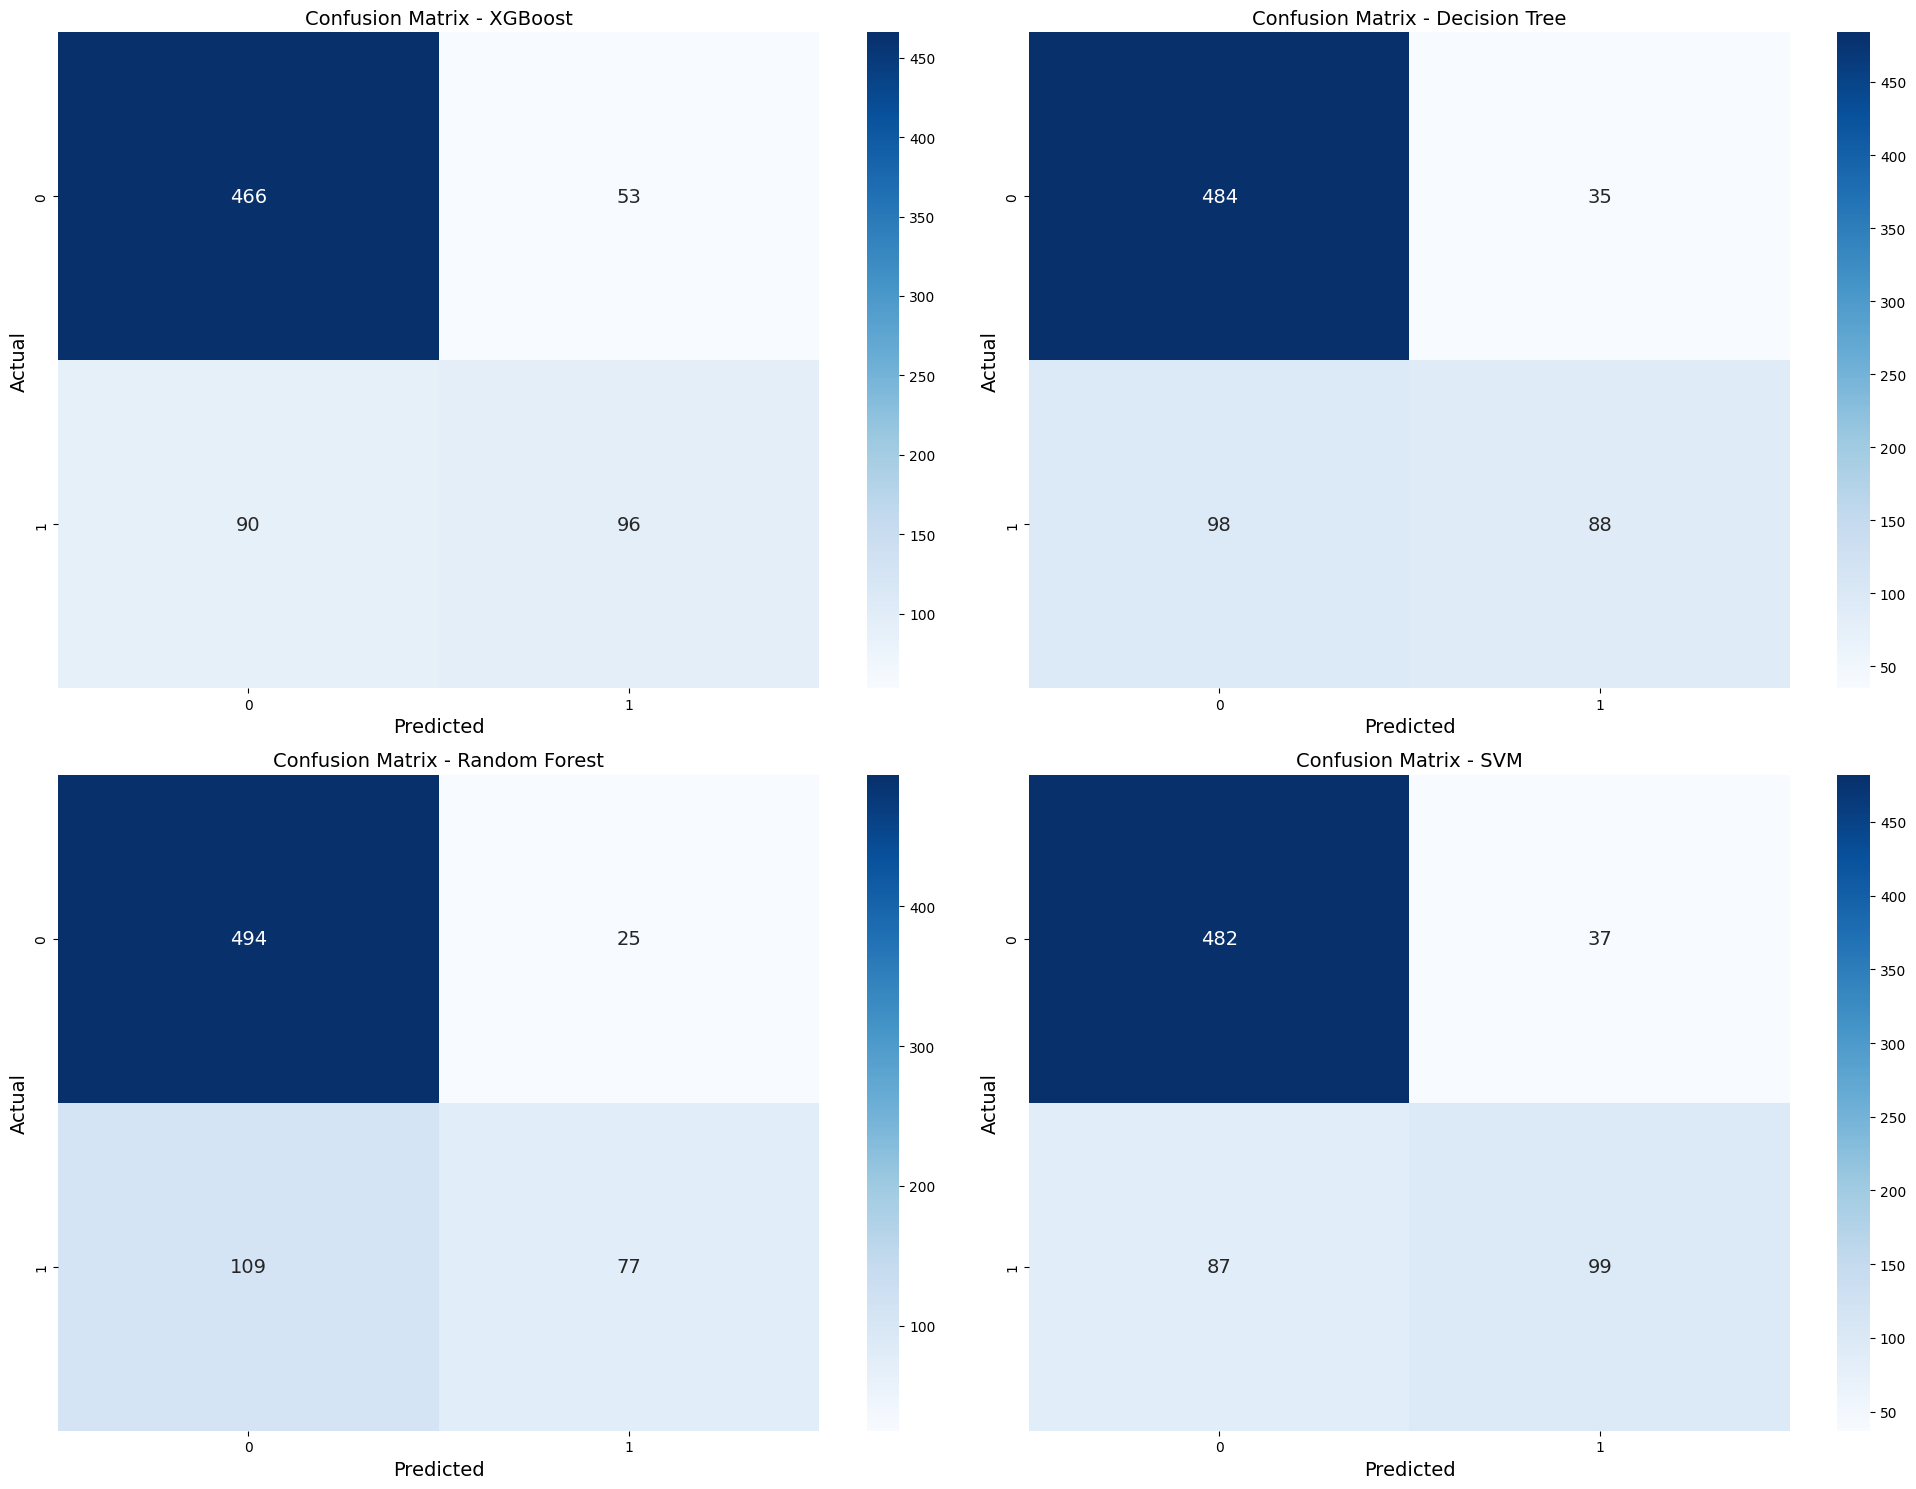

In [ ]:
predictions = [y_pred_xgb_best, y_pred_dt_best, y_pred_rf_best, y_pred_svm_best]

plt.figure(figsize=(20, 15))
for i, (model_name, y_pred) in enumerate(zip(model_names, predictions)):
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("\n=== Classification Report ===")
print("\nXGBoost:\n", classification_report(y_test, y_pred_xgb_best))
print("\nDecision Tree:\n", classification_report(y_test, y_pred_dt_best))
print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf_best))
print("\nSVM:\n", classification_report(y_test, y_pred_svm_best))


=== Classification Report ===

XGBoost:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       519
           1       0.64      0.52      0.57       186

    accuracy                           0.80       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.79      0.80      0.79       705


Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       519
           1       0.72      0.47      0.57       186

    accuracy                           0.81       705
   macro avg       0.77      0.70      0.72       705
weighted avg       0.80      0.81      0.80       705


Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       519
           1       0.75      0.41      0.53       186

    accuracy                           0.81       705
   macro avg       0.79      0.68      0.71       70

### Model Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores_xgb_test = cross_val_score(best_xgb, X_test, y_test, cv=5)
print("\nXGBoost Cross-Validation Scores on Test Data:", cv_scores_xgb_test)
print("Mean CV Score on Test Data:", cv_scores_xgb_test.mean())


XGBoost Cross-Validation Scores on Test Data: [0.77304965 0.73049645 0.77304965 0.80141844 0.82269504]
Mean CV Score on Test Data: 0.7801418439716312


In [ ]:
cv_scores_dt_test = cross_val_score(best_dt, X_test, y_test, cv=5)
print("\nDecision Tree Cross-Validation Scores on Test Data:", cv_scores_dt_test)
print("Mean CV Score on Test Data:", cv_scores_dt_test.mean())


Decision Tree Cross-Validation Scores on Test Data: [0.78014184 0.79432624 0.78723404 0.79432624 0.79432624]
Mean CV Score on Test Data: 0.7900709219858157


In [ ]:
cv_scores_rf_test = cross_val_score(best_rf, X_test, y_test, cv=5)
print("\nRandom Forest Cross-Validation Scores on Test Data:", cv_scores_rf_test)
print("Mean CV Score on Test Data:", cv_scores_rf_test.mean())


Random Forest Cross-Validation Scores on Test Data: [0.81560284 0.80851064 0.82978723 0.78723404 0.82269504]
Mean CV Score on Test Data: 0.8127659574468085


In [ ]:
cv_scores_svm_test = cross_val_score(best_svm, X_test, y_test, cv=5)
print("\nSVM Cross-Validation Scores on Test Data:", cv_scores_svm_test)
print("Mean CV Score on Test Data:", cv_scores_svm_test.mean())


SVM Cross-Validation Scores on Test Data: [0.81560284 0.79432624 0.83687943 0.78723404 0.82269504]
Mean CV Score on Test Data: 0.8113475177304965


## `EVALUATION INTERPRETATION`

### Perbandingan Confusion Matrix pada Data Test

|             | Predicted 0 | Predicted 1 |
|-------------|--------------|--------------|
| **Actual 0** | TN           | FP           |
| **Actual 1** | FN           | TP           |

| Model             | Actual | Predicted 0 | Predicted 1 |
|-------------------|--------|-------------|-------------|
| **XGBoost**       | **0**  | 466         | 53          |
|                   | **1**  | 90          | 96          |
| **Decision Tree** | **0**  | 484         | 35          |
|                   | **1**  | 98          | 88          |
| **Random Forest** | **0**  | 494         | 25          |
|                   | **1**  | 109         | 77          |
| **SVM**           | **0**  | 482         | 37          |
|                   | **1**  | 87          | 99          |


**Observasi**

- XGBoost: TP 96, FN 90 – cukup baik mendeteksi churn, tetapi FN masih tinggi.
- Decision Tree: TP 88, FN 98 – lebih sering salah mengklasifikasikan churn sebagai tidak churn.
- Random Forest: TP 77, FN 109, TN tertinggi (494) – andal mengenali tidak churn, tetapi FN tertinggi.
- SVM: TP 99, FN 87 – terbaik dalam mendeteksi churn dengan TP tertinggi dan FN terendah.

Secara keseluruhan, SVM memiliki performa terbaik dalam mengenali pelanggan churn, sementara Random Forest lebih unggul dalam mengidentifikasi pelanggan yang tidak churn.

### Perbandingan Accuracy pada Data Test

| Model          | Accuracy (Decimal) | Accuracy (%) |
|---------------|--------------------|--------------|
| XGBoost       | 0.79716             | 79.72%       |
| Decision Tree | 0.81135             | 81.13%       |
| Random Forest | 0.80993             | 80.99%       |
| SVM           | 0.82411             | 82.41%       |



**Observasi**

SVM memiliki Accuracy tertinggi (82.41%), diikuti oleh Decision Tree (81.13%) dan Random Forest (80.99%), dengan XGBoost terendah (79.72%). Semua model menunjukkan performa cukup baik, tetapi pemilihan terbaik perlu mempertimbangkan metrik lain seperti Precision dan Recall.

### Perbandingan Classification Report pada Data Test

| Model          | Class | Precision | Recall | F1-Score | Support |
|---------------|-------|-----------|--------|----------|---------|
| **XGBoost**   | 0     | 0.84      | 0.90   | 0.87     | 519     |
|               | 1     | 0.64      | **0.52**   | 0.57     | 186     |
|               | **Accuracy** | | | **0.80** | 705 |
|               | **Macro Avg** | 0.74 | 0.71 | 0.72     | 705     |
|               | **Weighted Avg** | 0.79 | 0.80 | 0.79     | 705     |
| **Decision Tree** | 0  | 0.83      | 0.93   | 0.88     | 519     |
|               | 1     | 0.72      | **0.47**   | 0.57     | 186     |
|               | **Accuracy** | | | **0.81** | 705 |
|               | **Macro Avg** | 0.77 | 0.70 | 0.72     | 705     |
|               | **Weighted Avg** | 0.80 | 0.81 | 0.80     | 705     |
| **Random Forest** | 0 | 0.82      | 0.95   | 0.88     | 519     |
|               | 1     | 0.75      | **0.41**   | 0.53     | 186     |
|               | **Accuracy** | | | **0.81** | 705 |
|               | **Macro Avg** | 0.79 | 0.68 | 0.71     | 705     |
|               | **Weighted Avg** | 0.80 | 0.81 | 0.79     | 705     |
| **SVM**       | 0     | 0.85      | 0.93   | 0.89     | 519     |
|               | 1     | 0.73      | **0.53**   | 0.61     | 186     |
|               | **Accuracy** | | | **0.82** | 705 |
|               | **Macro Avg** | 0.79 | 0.73 | 0.75     | 705     |
|               | **Weighted Avg** | 0.82 | 0.82 | 0.81     | 705     |



**Observasi**

SVM memiliki akurasi tertinggi (0.82) dan recall kelas 1 sebesar 0.53, menunjukkan keseimbangan yang lebih baik dibandingkan model lain dalam mengidentifikasi churn.
XGBoost memiliki akurasi terendah (0.80) dengan recall kelas 1 sebesar 0.52, sedikit lebih rendah dibandingkan SVM dan Decision Tree.
Decision Tree dan Random Forest memiliki akurasi yang sama (0.81), tetapi recall kelas 1 pada Decision Tree (0.47) lebih tinggi dibandingkan Random Forest (0.41), menunjukkan Random Forest paling sering gagal menangkap churn.

- Fokus utama adalah **Recall** untuk kelas 1 karena tujuan utamanya mendeteksi churn.

SVM menjadi model terbaik dengan akurasi tertinggi (0.82) dan recall kelas 1 sebesar 0.53, XGBoost memiliki recall kelas 1 sebesar 0.52 dengan akurasi terendah (0.80), sedikit di bawah SVM tetapi tetap cukup kompetitif.
Decision Tree dan Random Forest memiliki akurasi sama (0.81), namun recall Decision Tree lebih tinggi (0.47) dibanding Random Forest (0.41)

Secara keseluruhan, SVM dan XGBoost adalah pilihan terbaik untuk mendeteksi churn, tergantung pada toleransi terhadap False Negative.

Perbandingan `Cross-Validation Scores`

| Model           | CV Fold 1 | CV Fold 2 | CV Fold 3 | CV Fold 4 | CV Fold 5 | Mean CV Score |
|-----------------|-----------|-----------|-----------|-----------|-----------|---------------|
| **XGBoost**     | 0.7730    | 0.7305    | 0.7730    | 0.8014    | 0.8227    | **0.7801**    |
| **Decision Tree**| 0.7801    | 0.7943    | 0.7872    | 0.7943    | 0.7943    | **0.7901**    |
| **Random Forest**| 0.8156    | 0.8085    | 0.8298    | 0.7872    | 0.8227    | **0.8128**    |
| **SVM**         | 0.8156    | 0.7943    | 0.8369    | 0.7872    | 0.8227    | **0.8113**    |

**Observasi**<br>
- Random Forest memiliki Mean CV Score tertinggi (0.8128), menunjukkan performa yang stabil di setiap fold.
- SVM menunjukkan hasil yang konsisten dengan Mean CV Score 0.8113.
- Decision Tree memiliki Mean CV Score 0.7901, sedikit lebih rendah dibandingkan model lainnya.
- XGBoost memiliki Mean CV Score terendah (0.7801) dengan variasi performa di setiap fold.

**Kesimpulan Final**

SVM dan XGBoost terbaik untuk mendeteksi churn, tergantung toleransi terhadap False Negative. Random Forest dan Decision Tree lebih andal dalam mengidentifikasi pelanggan yang tidak churn.

## `POTENTIAL IMPACT`

`SVM` dan `XGBoost` berpotensi memberikan dampak positif terbesar dalam mendeteksi churn dengan akurat, sehingga strategi retensi dapat lebih tepat sasaran dan meningkatkan pendapatan perusahaan.
Decision Tree dan Random Forest memiliki risiko lebih tinggi dalam gagal mendeteksi churn, yang dapat berdampak pada hilangnya pelanggan potensial.

Implementasi model prediksi churn ini dapat:

- Mengurangi Churn: Dengan menargetkan pelanggan berisiko tinggi secara efektif.
- Meningkatkan Pendapatan: Melalui retensi pelanggan yang lebih tinggi dan pengurangan biaya akuisisi pelanggan baru.

Simulasi Dampak Finansial:
- Identifikasi pelanggan berisiko tinggi dan potensi kerugian jika churn terjadi.
- Strategi retensi yang tepat dapat menyelamatkan pendapatan.
- Perbandingan pendapatan dengan dan tanpa model menunjukkan nilai tambah dari implementasi ini.

Memilih SVM atau XGBoost dapat secara signifikan meningkatkan efektivitas kampanye retensi dan memberikan dampak finansial positif bagi perusahaan.